# Data Science Salary 💰 2021 to 2023

## Project overview and objectives

**Introducing the Dataset:** Data Science Salary Trends 2023

This dataset aims to shed light on the salary trends in the field of Data Science for the years 2021 to 2023. With a focus on various aspects of employment, including work experience, job titles, and company locations, this dataset provides valuable insights into salary distributions within the industry.     

**Data Fields:**

- work_year: Representing the specific year of salary data collection.    
- Experience_level: The level of work experience of the employees, categorized as EN (Entry-Level), EX (Experienced), MI (Mid-Level), SE (Senior).      
- Employment_type: The type of employment, labelled as FT (Full-Time), CT (Contractor), FL (Freelancer), PT (Part-Time).         
- Job_title: The job titles of the employees, such as "Applied Scientist", "Data Quality Analyst" , etc.     
- Salary: The salary figures in their respective currency formats.     
- Salary_currency: The currency code representing the salary.       
- Salary_in_usd: The converted salary figures in USD for uniform comparison.       
- Company_location: The location of the companies, specified as country codes (e.g., "US" for the United States and "NG" for Nigeria).     
- Company_size: The size of the companies, classified as "L" (Large), "M" (Medium), and "S" (Small).     


**Potential Problem Statements:**    

1. Optimal Hiring Decisions: Determine the best employment type and experience level for hiring data science professionals for maximum cost-effectiveness.      
         
2. Salary Trends over Time: Utilize the dataset to visualize and interpret data science salary trends from 2021 to 2023.      
        
3. Job Title Recommendation: Recommend suitable job titles for candidates based on their experience level and desired salary range.
   

## Import libraries and dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import random

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as  xgb
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error, r2_score

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Data loading

In [3]:
df = pd.read_csv('DS_Salary_2021_2023.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


Our dataset consists of 3761 data objects and includes 9 features. Notably, there are no missing values in the dataset.    
The key feature for our analysis is 'salary_in_usd,' which is converted to USD for uniform comparison.

## EDA

### Descriptive statistics and salary distribution

In [5]:
df.describe()

,work_year,salary,salary_in_usd
count,3761.000000,3.761000e+03,3761.000000
mean,2022.374103,1.905999e+05,137555.178942
std,0.691252,6.711457e+05,63022.267974
min,2020.000000,6.000000e+03,5132.000000
25%,2022.000000,1.000000e+05,95000.000000
50%,2022.000000,1.375000e+05,135000.000000
75%,2023.000000,1.800000e+05,175000.000000
max,2023.000000,3.040000e+07,450000.000000


In [6]:
df.describe(include="object")

,experience_level,employment_type,job_title,salary_currency,company_location,company_size
count,3761,3761,3761,3761,3761,3761
unique,4,4,93,20,72,3
top,SE,FT,Data Engineer,USD,US,M
freq,2518,3724,1040,3229,3045,3157


Our data mainly contains information about employees of Senior level, with full-time jobs, working in the USA in the medium-sized companies.

In [7]:
df.work_year.value_counts()

2023    1789
2022    1666
2021     230
2020      76
Name: work_year, dtype: int64

In [8]:
df.experience_level.value_counts()

SE    2518
MI     809
EN     320
EX     114
Name: experience_level, dtype: int64

In [9]:
df.employment_type.value_counts()

FT    3724
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

In [10]:
df.company_size.value_counts()

M    3157
L     456
S     148
Name: company_size, dtype: int64

In [11]:
# Top 15 the most frequent job-titles in our data
df.job_title.value_counts().head(15)

Data Engineer                 1040
Data Scientist                 840
Data Analyst                   614
Machine Learning Engineer      291
Analytics Engineer             103
Data Architect                 101
Research Scientist              82
Applied Scientist               58
Data Science Manager            58
Research Engineer               37
ML Engineer                     34
Data Manager                    29
Machine Learning Scientist      26
Data Science Consultant         24
Data Analytics Manager          22
Name: job_title, dtype: int64

In [12]:
# The salary statistic and distribution
df.salary_in_usd.describe()

count      3761.000000
mean     137555.178942
std       63022.267974
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

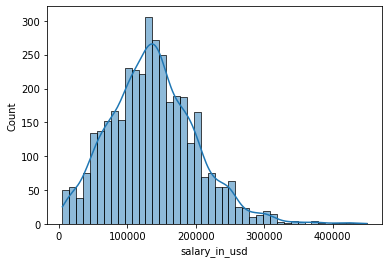

In [13]:
sns.histplot(df.salary_in_usd, kde=True)

Our data mainly contains information about employees at the Senior level, employed full-time in medium-sized companies within the USA.      
The dataset's average salary is \\$137,555, with salaries ranging from \\$5,132 to \\$450,000. However, a histogram of the salary data reveals the presence of outliers, particularly in the form of a long right tail.      
We should further investigate these outlier values.

### Finding outliers in salary

In [14]:
z_scores = np.abs(stats.zscore(df.salary_in_usd))
outliers = np.where(z_scores > 3)
df.loc[outliers].head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
122,2023,EX,FT,Head of Data,329500,USD,329500,US,M
136,2023,EX,FT,Director of Data Science,353200,USD,353200,US,M
331,2023,MI,FT,Research Scientist,340000,USD,340000,US,M
529,2023,SE,FT,Computer Vision Engineer,342810,USD,342810,US,M
608,2023,SE,FT,Machine Learning Engineer,342300,USD,342300,US,L
893,2023,SE,FT,AI Scientist,1500000,ILS,423834,IL,L
966,2023,SE,FT,Data Architect,376080,USD,376080,US,M
1284,2023,SE,FT,Data Scientist,370000,USD,370000,US,M
1414,2023,SE,FT,Data Analyst,385000,USD,385000,US,M
1432,2023,SE,FT,Research Scientist,370000,USD,370000,US,M


In [15]:
df.loc[outliers].experience_level.value_counts()

SE    15
MI     4
EX     3
Name: experience_level, dtype: int64

In [16]:
bound_4std = df.salary_in_usd.mean() + 3*df.salary_in_usd.std()
bound_4std

326621.9828641927

In [17]:
df_no_outliers = df[df.salary_in_usd < bound_4std]
df_no_outliers.shape

(3739, 9)

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

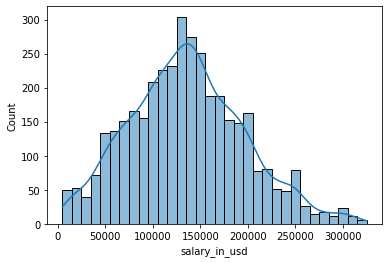

In [18]:
sns.histplot(df_no_outliers.salary_in_usd, kde=True)

 The majority of outliers in our dataset are associated with Senior-level employees. These outliers, while infrequent, represent real-world cases. Consequently, we won't remove these outliers from the data for the further analysis.

### Salary by experience level

In [19]:
sns.set_theme(font_scale=1.3, style="whitegrid")
sns.set_palette("pastel")


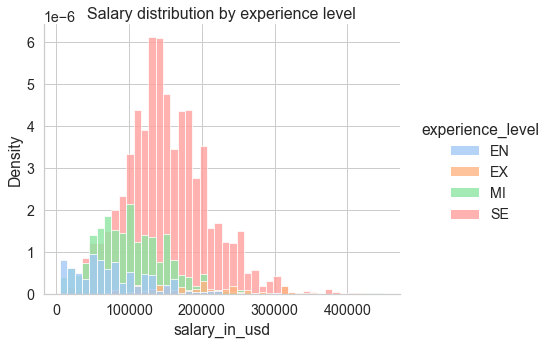

In [20]:
sns.displot(df, x="salary_in_usd", hue="experience_level", stat="density", alpha=0.8, 
            height=5, aspect=1.2)
plt.title("Salary distribution by experience level", fontdict={'fontsize':16})
plt.show()

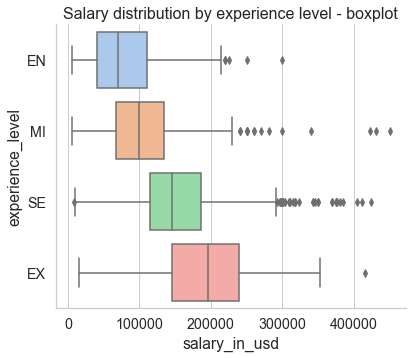

In [21]:
sns.catplot(x='salary_in_usd', y='experience_level', kind='box', order=['EN', 'MI','SE', 'EX'], 
           data=df, height=5, aspect=1.2)
plt.title("Salary distribution by experience level - boxplot", fontdict={'fontsize':16})
plt.show()

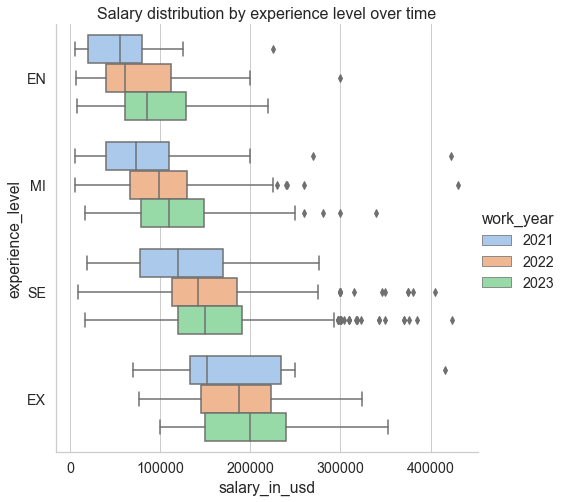

In [22]:
sns.catplot(x='salary_in_usd', y='experience_level', kind='box', hue='work_year', order=['EN', 'MI','SE', 'EX'], 
           data=df[df.work_year>2020], height=7, aspect=1)
plt.title("Salary distribution by experience level over time", fontdict={'fontsize':16})
plt.show()

### Salary by the company size

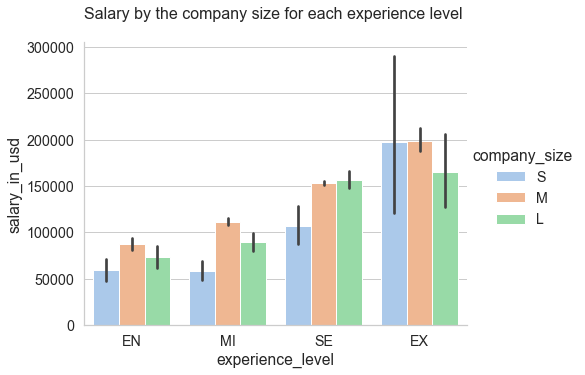

In [23]:
sns.catplot(x='experience_level', y='salary_in_usd', hue='company_size', 
               order=['EN', 'MI','SE', 'EX'], hue_order=['S','M','L'], 
               kind='bar',  data=df, height=5, aspect=1.4)
plt.title("Salary by the company size for each experience level \n", fontdict={'fontsize':16})
plt.show()

In [24]:
df.pivot_table(index='experience_level', values='salary_in_usd', columns='company_size')[['S', 'M','L']]

company_size,S,M,L
experience_level,,,
EN,59120.734694,87416.456140,72896.810000
EX,196827.166667,198857.284211,165363.153846
MI,58080.500000,111540.260032,89582.264706
SE,106875.465116,153655.465168,156159.690821


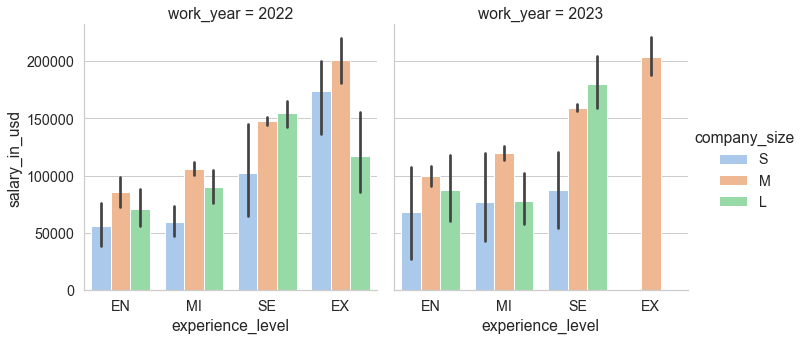

In [25]:
# Salary by the company size for 2 last years
sns.catplot(x='experience_level', y='salary_in_usd', hue='company_size', col='work_year', 
               order=['EN', 'MI','SE', 'EX'], hue_order=['S','M','L'], 
               kind='bar', data=df[df.work_year>2021])
plt.show()

### Salary by the employment type

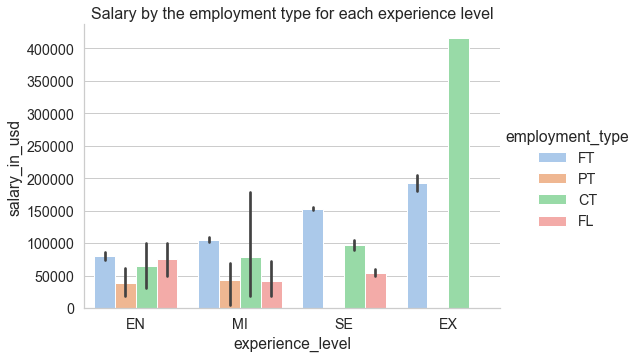

In [26]:
sns.catplot(x='experience_level', y='salary_in_usd', hue='employment_type', 
               order=['EN', 'MI','SE', 'EX'], kind='bar', data=df, height=5, aspect=1.5)
plt.title("Salary by the employment type for each experience level", fontdict={'fontsize':16})
plt.show()

### Exploring job titles

In [27]:
df.job_title.value_counts()[:20]

Data Engineer                 1040
Data Scientist                 840
Data Analyst                   614
Machine Learning Engineer      291
Analytics Engineer             103
Data Architect                 101
Research Scientist              82
Applied Scientist               58
Data Science Manager            58
Research Engineer               37
ML Engineer                     34
Data Manager                    29
Machine Learning Scientist      26
Data Science Consultant         24
Data Analytics Manager          22
Computer Vision Engineer        18
AI Scientist                    16
BI Data Analyst                 15
Business Data Analyst           15
Data Specialist                 14
Name: job_title, dtype: int64

In [28]:
# Replace in all job titles "Machine Learning" with "ML" 
df['job_title'] = df.job_title.apply(lambda x: x.replace("Machine Learning", "ML") 
                                     if "Machine Learning" in x else x)
# Combine the most similar job titles
df.job_title.replace({ 'Data Scientist Lead': 'Data Science Lead',
                         'Computer Vision Software Engineer': 'Computer Vision Engineer',
                         }, inplace=True)

Let's take 10 the most frequent job titles for our analysis.

In [29]:
top10_job = df.job_title.value_counts()[:10].index

df_top10_job = df.query('job_title in @top10_job')
df_top10_job.shape

(3258, 9)

In [30]:
top10_job_sort = df_top10_job.groupby('job_title').agg('median').sort_values('salary_in_usd')[['salary_in_usd']].round()
top10_job_sort

,salary_in_usd
job_title,
Data Analyst,106020.0
Data Engineer,135000.0
Data Scientist,141525.0
Analytics Engineer,143860.0
ML Engineer,150000.0
Research Scientist,150000.0
Research Engineer,155000.0
Data Architect,160000.0
Data Science Manager,183780.0


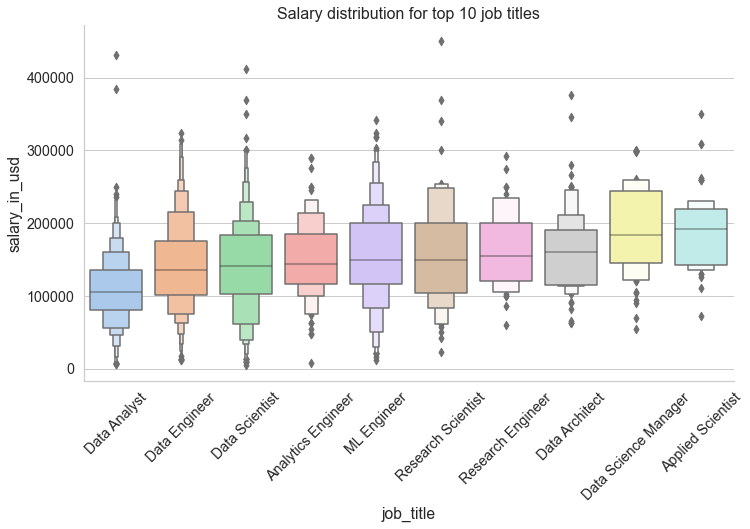

In [31]:
sns.catplot(
    data=df_top10_job, order = top10_job_sort.index.to_list(),
    x="job_title", y="salary_in_usd", kind="boxen", height=6, aspect=1.8, 
)
plt.title('Salary distribution for top 10 job titles', fontdict={'fontsize':16})
plt.xticks(rotation=45)
plt.show()

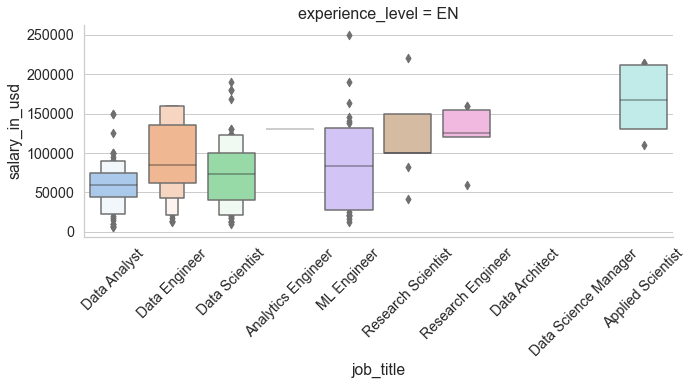

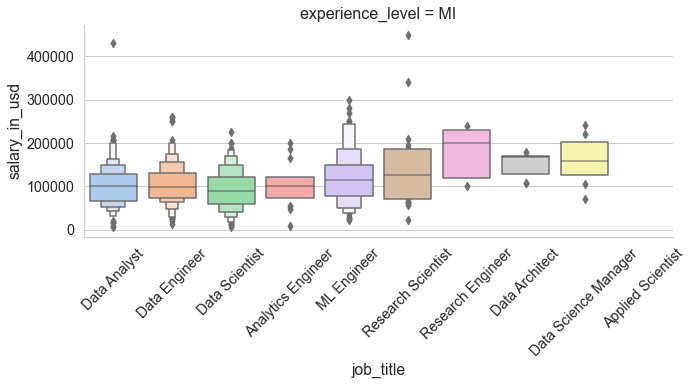

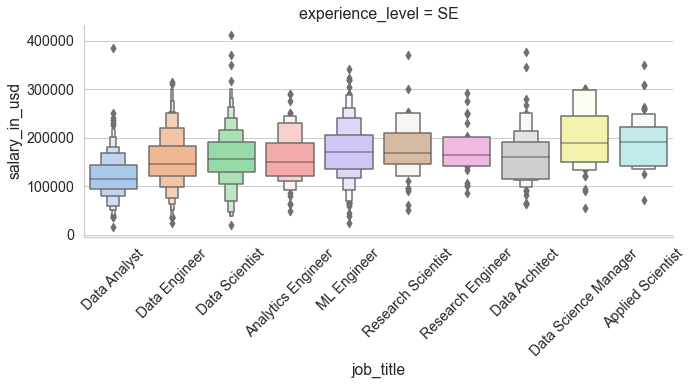

In [32]:
for ex_level in ['EN','MI','SE']:
    sns.catplot(
    data=df_top10_job[df_top10_job.experience_level==ex_level], order = top10_job_sort.index,
    x="job_title", y="salary_in_usd", kind="boxen", height=4, aspect=10/4
    )
    plt.title(f'experience_level = {ex_level}', fontdict={'fontsize':16})
    plt.xticks(rotation=45)
    plt.show()

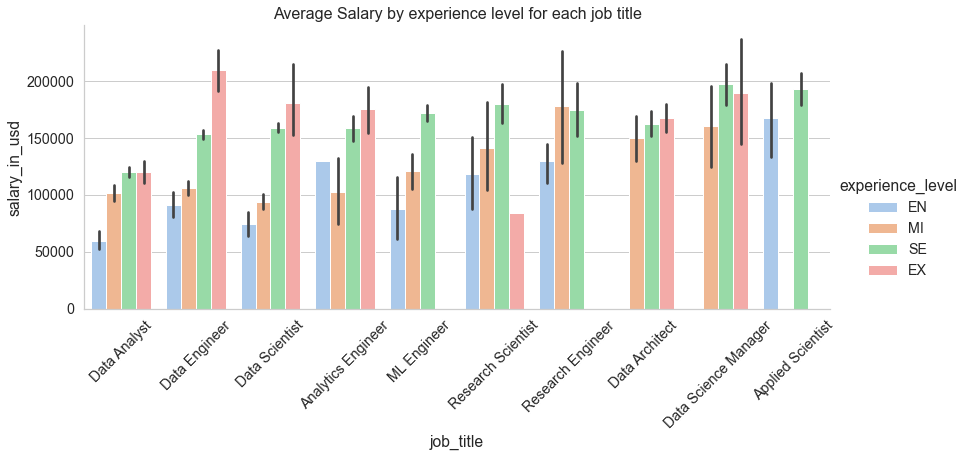

In [33]:
sns.catplot(x='job_title', y='salary_in_usd', hue='experience_level', 
            order=top10_job_sort.index, hue_order=['EN', 'MI','SE', 'EX'], 
            kind='bar', data=df_top10_job, height=5, aspect=12/5)
plt.title('Average Salary by experience level for each job title', fontdict={'fontsize':16})
plt.xticks(rotation=45)
plt.show()

### Company location

In [34]:
df.company_location.value_counts()[:10]


US    3045
GB     173
CA      87
ES      77
IN      58
DE      56
FR      34
BR      15
PT      14
GR      14
Name: company_location, dtype: int64

In [35]:
df.groupby('company_location')['salary_in_usd'].agg(['min', max, 'mean']).sort_values('mean', ascending=False)[:10]

,min,max,mean
company_location,,,
IL,119059,423834,271446.500000
PR,135000,200000,167500.000000
US,5679,450000,151801.053859
RU,85000,230000,140333.333333
CA,15000,275000,131917.689655
NZ,125000,125000,125000.000000
BA,120000,120000,120000.000000
IE,68293,172309,114943.428571
JP,41689,260000,114127.333333


The top 3 countries with the highest average salaries for Data Science specialists are Israel, Puerto Rico, and the USA.

**EDA Conclusion:**      

In our dataset, the predominant profile of employees is at the Senior level, engaged in full-time positions within medium-sized companies located in the USA. The target variable, 'salary in USD,' follows a normal distribution with an average value of $137,555.  
Notably, we've identified outliers in the salary distribution, primarily associated with Senior-level employees.       

A closer examination of the salary distribution, segmented by experience level, underscores a direct correlation between experience and salary, with variations based on company size.    
The visualization of salary distribution across the top 10 most frequently occurring job titles offers insights into the average salary range for each role and highlights the lowest average salary (for Data Analyst) and the highest average salaries (for Data Science Manager and Applied Scientist).       

These observations provide a foundation for further data analysis and decision-making in our project.

## Feature engineering

In [36]:
df.job_title.value_counts()[:20]

Data Engineer               1040
Data Scientist               840
Data Analyst                 614
ML Engineer                  325
Analytics Engineer           103
Data Architect               101
Research Scientist            82
Applied Scientist             58
Data Science Manager          58
Research Engineer             37
Data Manager                  29
ML Scientist                  26
Data Science Consultant       24
Computer Vision Engineer      23
Data Analytics Manager        22
AI Scientist                  16
BI Data Analyst               15
Business Data Analyst         15
Data Specialist               14
BI Developer                  13
Name: job_title, dtype: int64

I am going to divide all job titles into 4 categories:     
Data Science, Data Analysis, Data Engineering, Lead & Management 


In [37]:
Data_Science = ["Data Scientist",  "Research Scientist",  "Applied Scientist",  
                 "AI Scientist", "AI Developer",   "Machine Learning Developer" ,   
                "Machine Learning Scientist",  "Applied Machine Learning Scientist",  
                "Machine Learning Researcher","AI Programmer","3D Computer Vision Researcher",
                "Deep Learning Researcher",  "Product Data Scientist", 'Applied Data Scientist',
                'Staff Data Scientist'
               ]

Data_Analysis = ["Data Analyst",  "Data Analytics Manager",  "BI Data Analyst",  "Business Data Analyst", 
                 "Data Specialist",  "Data Analytics Engineer",  "BI Developer",  "BI Analyst",  
                 "Data Quality Analyst",   "Data Analytics Consultant",  "Power BI Developer",
                 "Data Analytics Specialist",  "Finance Data Analyst",  "Analytics Engineer",
                 "Insight Analyst",  "Compliance Data Analyst",  "Product Data Analyst",'Financial Data Analyst',
                 'Data Operations Analyst', 'Marketing Data Analyst'                
                ]

Data_Engineering = ["Data Engineer", "Research Engineer",   "Big Data Engineer", 
                 "Marketing Data Engineer",  "Data Operations Engineer",  "Deep Learning Engineer",
                 "ETL Developer",  "Data Infrastructure Engineer",  "Cloud Database Engineer", 
                     "Autonomous Vehicle Technician", 'BI Data Engineer', 'Applied Machine Learning Engineer',
                 "Cloud Data Engineer",  "Data DevOps Engineer",  "Azure Data Engineer", "Data Architect",
                    "Cloud Data Architect", "Machine Learning Engineer", "Machine Learning Infrastructure Engineer",
                    "Machine Learning Research Engineer", "Computer Vision Engineer",  'ML Engineer', 
                    'ETL Engineer', 'MLOps Engineer', 'Software Data Engineer', 'Machine Learning Software Engineer',
                    'Computer Vision Software Engineer', 'Data Science Engineer', 'NLP Engineer',
                ]


Lead_Management = [  "Director of Data Science",  "Head of Data",   "Data Science Lead", "Machine Learning Manager", 
                       "Head of Data Science",  "Principal Data Architect", "Data Science Manager",  
                       "Data Science Tech Lead", "Principal Data Scientist", "Principal Machine Learning Engineer",   
                       "Principal Machine Learning Engineer" , "Lead Data Analyst", "Lead Machine Learning Engineer",
                      ]

In [38]:
df['job_cat'] = df.job_title.apply(lambda x: 'Data Science' if x in Data_Science else 
                                   'Data Analysis' if x in Data_Analysis else
                                   'Data Engineering' if x in Data_Engineering else
                                   'Lead & Management')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size,job_cat
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L,Data Science
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L,Data Science
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L,Data Analysis
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L,Data Analysis
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L,Data Science


In [39]:
df.job_cat.value_counts()

Data Engineering     1606
Data Science         1026
Data Analysis         841
Lead & Management     288
Name: job_cat, dtype: int64

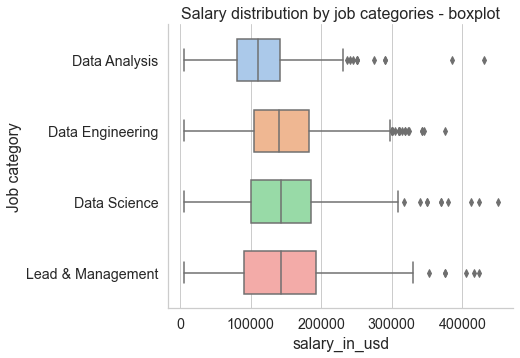

In [40]:
g = sns.catplot(x='salary_in_usd', y='job_cat',  kind='box', data=df, height=5, aspect=1.5,  width=0.6,
                order=['Data Analysis','Data Engineering', 'Data Science', 'Lead & Management'])
g.set_ylabels(label='Job category', )

plt.title("Salary distribution by job categories - boxplot", fontdict={'fontsize':16})
plt.show()

In [41]:
df1 = df.groupby(by='job_cat')['salary_in_usd'].agg([min, max, 'median', 'mean']).sort_values('median')
job_cat_sorted = df1.index.to_list()
df1

,min,max,median,mean
job_cat,,,,
Data Analysis,5409,430967,110000.0,112408.181926
Data Engineering,5132,376080,140000.0,145119.627646
Lead & Management,5707,423000,142923.0,146971.458333
Data Science,5409,450000,142950.0,143684.059454


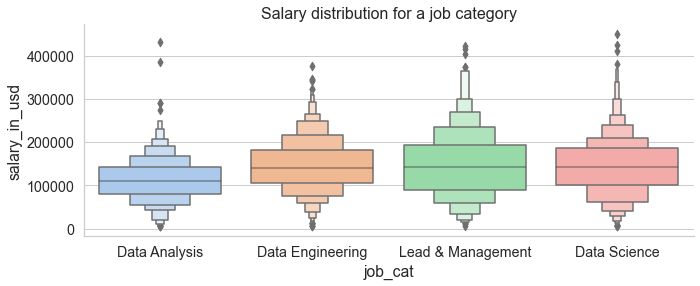

In [42]:
sns.catplot(
    data=df, order = job_cat_sorted,
    x="job_cat", y="salary_in_usd", kind="boxen", height=4, aspect=2.5
)
plt.title('Salary distribution for a job category', fontdict={'fontsize':16})
plt.show()


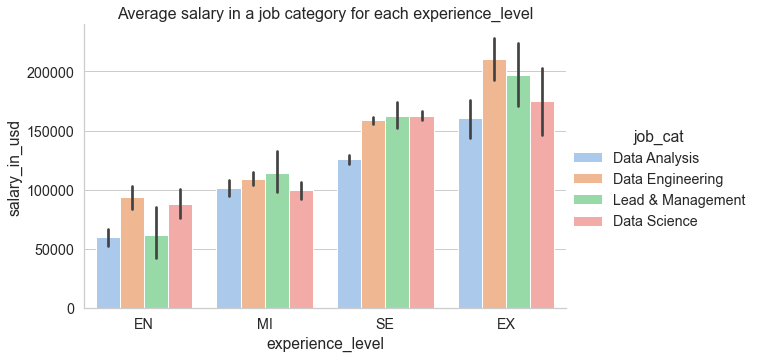

In [43]:
sns.catplot(x='experience_level', y='salary_in_usd', hue='job_cat',  order=['EN', 'MI','SE', 'EX'],
               hue_order=job_cat_sorted, kind='bar', data=df[df.work_year>2020], height=5, aspect=1.7)
plt.title('Average salary in a job category for each experience_level', fontdict={'fontsize':16})
plt.show()

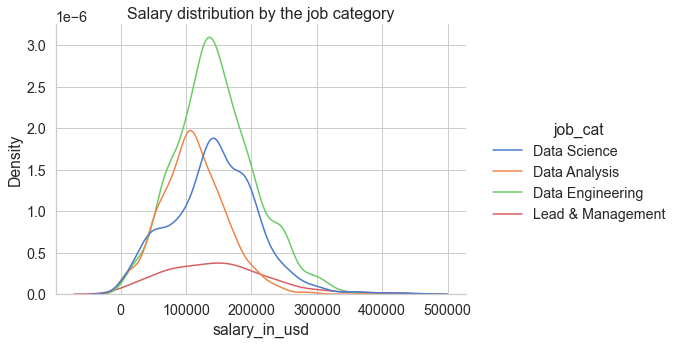

In [44]:
sns.displot(df, x="salary_in_usd", hue="job_cat", kind="kde", palette="muted", height=5, aspect=1.4)
plt.title("Salary distribution by the job category", fontdict={'fontsize':16})
plt.show()


**Geographical Regions:**
Let's group the countries by geographical regions.    

- Asia: TH, IR, CN, PH, ID, AM, VN, HK, IN, PK, IQ, SG
- Europe: RO, MD, PL, GB, AT, SE, GR, MA, ES, PT, MT, DE, HU, BE, LT, CH, CZ, NL, SK, BA, LU, LV, TR, MK, SI, FI, DK, RU     
- North America: PR, CA, US
- South America: CL, BO, AR, HN, BR, CO
- Africa: EG, DZ, CF, NG, GH, KE
- Oceania: AU, NZ

In [45]:
geographical_regions = {
    'Asia': ["TH", "IR", "CN", "PH", "ID", "AM", "VN", "HK", "IN", "PK", "IQ", "SG", 'JP','AE','IL','MY'],
    'Europe': ["RO", "MD", "PL", "GB", "AT", "SE", "GR", "MA", "ES", "PT", "MT", "DE", "HU", 'HR',
               "BE", "LT", "CH", "CZ", "NL", "SK", "BA", "LU", "LV", "TR", "MK", "SI", "FI", "DK",
               "FR", 'IE', 'UA','IT','EE','AL', "RU"],
    'North America': ["PR", "CA", "US", 'MX','CR','BS'],
    'South America': ["CL", "BO", "AR", "HN", "BR", "CO"],
    'Africa': ["EG", "DZ", "CF", "NG", "GH", "KE"],
    'Oceania': ["AU", "NZ",'AS']
}
# Create a reverse mapping from countries to regions
countries_to_regions = {country: region for region, countries in geographical_regions.items() for country in countries}

In [46]:
df['region'] = df.company_location.replace(countries_to_regions)
df['region'].value_counts()

North America    3148
Europe            465
Asia               92
South America      25
Oceania            18
Africa             13
Name: region, dtype: int64

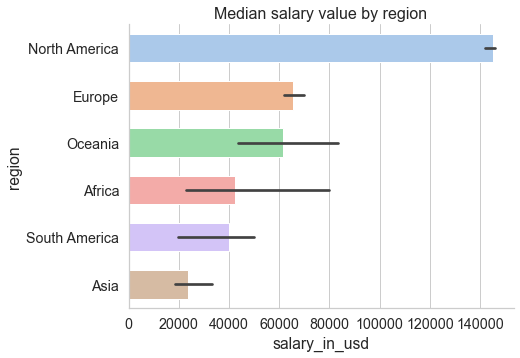

In [47]:
g = sns.catplot(x='salary_in_usd', y='region',  kind='bar', data=df, height=5, aspect=1.5,  width=0.6,
                order=df.groupby('region').median().sort_values('salary_in_usd', ascending=False).index, estimator='median',
               )
plt.title("Median salary value by region", fontdict={'fontsize':16})
plt.show()

## Optimal Hiring Decisions (prediction of potential salary)

Let's determine the best employment type and experience level for hiring data science professionals for maximum cost-effectiveness.     

We are going to build a predictive model that can estimate salary for top 20 most frequent job titles, based on the chosen features (experience level, size of company, job title, company_location and employment type). For this purpose we will use several regression techniques and then will choose the best model.

### Data modeling

In [48]:
df.job_title.value_counts()[:20]

Data Engineer               1040
Data Scientist               840
Data Analyst                 614
ML Engineer                  325
Analytics Engineer           103
Data Architect               101
Research Scientist            82
Applied Scientist             58
Data Science Manager          58
Research Engineer             37
Data Manager                  29
ML Scientist                  26
Data Science Consultant       24
Computer Vision Engineer      23
Data Analytics Manager        22
AI Scientist                  16
BI Data Analyst               15
Business Data Analyst         15
Data Specialist               14
BI Developer                  13
Name: job_title, dtype: int64

In [49]:
top20_job = df.job_title.value_counts()[:20].index
df_top20_job = df.query('job_title in @top20_job')
df_top20_job.shape

(3455, 11)

In [50]:
# Convert categorical variables into a numerical format using one-hot encoding. 

features = ['experience_level', 'employment_type', 'company_size', 'job_title', 'company_location']
target = 'salary_in_usd'

X = df_top20_job[features]
y = df_top20_job[target]

encoder = OneHotEncoder(sparse=False,drop='first')

# Fit and transform the categorical features
X_encoded = encoder.fit_transform(X)

# Create a DataFrame with the encoded features
X_final = pd.DataFrame(X_encoded, columns=encoder.get_feature_names(), index = X.index)

X_final.head()

,x0_EX,x0_MI,x0_SE,x1_FL,x1_FT,x1_PT,x2_M,x2_S,x3_Analytics Engineer,x3_Applied Scientist,...,x4_PT,x4_RO,x4_RU,x4_SG,x4_SI,x4_TH,x4_TR,x4_UA,x4_US,x4_VN
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.25,  random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2591, 86)
(2591,)
(864, 86)
(864,)


In [52]:
# Create a list of regression models to test
models = [
    {
        'name': 'Random Forest',
        'model': RandomForestRegressor(random_state=42),
        'param_grid': {
            'model__n_estimators': [100, 200, 300],
            'model__max_depth': [3, 5, 7, 10]
        }
    },
    {
        'name': 'XGBoost',
        'model': XGBRegressor(random_state=42, objective ='reg:squarederror'),
        'param_grid': {
            'model__n_estimators': [50, 100, 150, 200],
            'model__max_depth': [3, 4, 5, 7],
        }
    }
]

# A dictionary to store the results
results = {}

for model_info in models:
    model_name = model_info['name']
    model = model_info['model']
    param_grid = model_info['param_grid']

    pipeline = Pipeline([('model', model)])

    # Performing grid search with cross-validation
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='neg_root_mean_squared_error',  
        cv=5
    )

    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    best_score = - grid_search.best_score_

    results[model_name] = {
        'Best Hyperparameters': best_params,
        'Best score': np.round(best_score, 2),
        }

# Displaying the results
for model_name, metrics in results.items():
    print(f'Model: {model_name}')
    print(f'Best Hyperparameters: {metrics["Best Hyperparameters"]}')      
    print(f'Best cross-validation score: {metrics["Best score"]}')
    print()

Model: Random Forest
Best Hyperparameters: {'model__max_depth': 10, 'model__n_estimators': 300}
Best cross-validation score: 49012.81

Model: XGBoost
Best Hyperparameters: {'model__max_depth': 4, 'model__n_estimators': 150}
Best cross-validation score: 48318.34



In [53]:
best_model = XGBRegressor(max_depth=4,n_estimators=150, objective ='reg:squarederror', random_state=42)
best_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

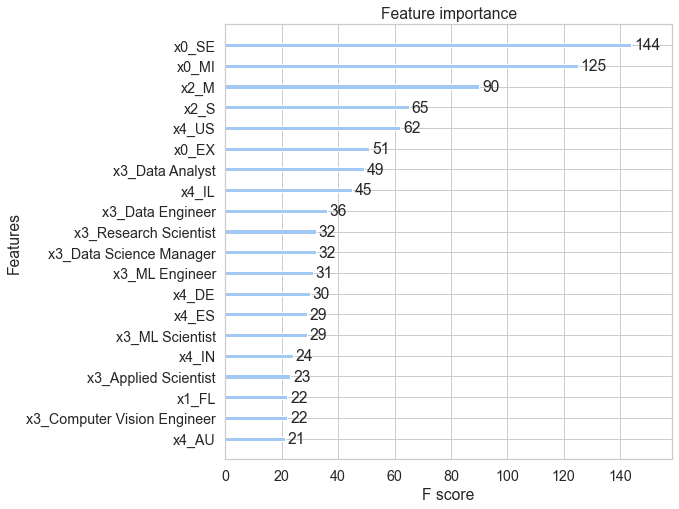

In [54]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
xgb.plot_importance(best_model, max_num_features=20,  ax=ax)

### Model Evaluation

In [55]:
# Predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluation of the model
mse = mean_squared_error(y_test, y_pred)
mae = median_absolute_error(y_test, y_pred)
mean_abs_er = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'RMSE: {np.round(np.sqrt(mse),1)}')
print(f'Median Absolute Error: {np.round(mae,1)}')
print(f'Mean Absolute Error: {np.round(mean_abs_er,1)}')
print(f'R-squared: {np.round(r_squared,3)}')

RMSE: 44256.3
Median Absolute Error: 27869.1
Mean Absolute Error: 34099.4
R-squared: 0.446


### Calculating cost-effectiveness for hiring a Data Scientist in a medium size company

Let's make predictions for our own test dataset. For example, we want to decide which Data Science specialist should we hire in a medium size company for most effectiveness.

In [56]:
# Our own test set
mytest = pd.DataFrame({'experience_level': ['EN','MI','SE','EX']*3,
                       'employment_type': ['FT']*4 + ['PT']*4 + ['CT']*4,
                       'company_size': ['M']*12,
                       'job_title': ['Data Scientist']*12,
                      # 'job_cat': ['Data Science']*12,
                       'company_location': ['US']*12
                      })
mytest

,experience_level,employment_type,company_size,job_title,company_location
0,EN,FT,M,Data Scientist,US
1,MI,FT,M,Data Scientist,US
2,SE,FT,M,Data Scientist,US
3,EX,FT,M,Data Scientist,US
4,EN,PT,M,Data Scientist,US
5,MI,PT,M,Data Scientist,US
6,SE,PT,M,Data Scientist,US
7,EX,PT,M,Data Scientist,US
8,EN,CT,M,Data Scientist,US
9,MI,CT,M,Data Scientist,US


In [57]:
X_mytest = pd.DataFrame(encoder.transform(mytest),columns=encoder.get_feature_names())

In [58]:
y_mypred = best_model.predict(X_mytest)

mytest['predicted_salary'] = y_mypred.round()
mytest.sort_values(by='predicted_salary')

,experience_level,employment_type,company_size,job_title,company_location,predicted_salary
8,EN,CT,M,Data Scientist,US,117804.0
4,EN,PT,M,Data Scientist,US,120499.0
0,EN,FT,M,Data Scientist,US,124896.0
9,MI,CT,M,Data Scientist,US,125612.0
5,MI,PT,M,Data Scientist,US,128307.0
1,MI,FT,M,Data Scientist,US,132704.0
6,SE,PT,M,Data Scientist,US,156465.0
10,SE,CT,M,Data Scientist,US,156465.0
2,SE,FT,M,Data Scientist,US,163557.0
11,EX,CT,M,Data Scientist,US,175306.0


Calculating the cost-effectiveness of different hiring decisions based on our salary prediction model involves considering not only the predicted salaries but also the other costs (like benefits, training, onboarding, equipment, hiring etc.) associated with different employment types and experience levels.   

We can calculate cost-effectiveness as the ratio of predicted salary to total cost.        

**cost_effectiveness = predicted_salary / total_cost**       

'Total cost' represents the overall financial expenses required to hire and maintain the employee. This includes the salary and other associated costs like benefits, training, onboarding, equipment, and any other expenses related to the employment.   

For example, we can calculate **cost-effectiveness of hiring a Data Scientist in the medium size company**.
To do this, we need to determine the costs for each employment type and experience level.    

Let's take the following assumptions (just an example):   
By levels:       En, Mi, Se, Ex      
        
**Costs for Full-Time empoyees:** 35000, 40000, 50000, 60000          
 
**Costs for Part-Time empoyees:** 30000, 35000, 45000, 55000         
 
**Costs for Contract empoyees:** 25000, 30000, 40000, 50000       

In [59]:
costs = np.array([35000, 40000, 50000, 60000, 30000, 35000, 45000, 55000, 25000, 30000, 40000, 50000])
mytest['internal_cost'] = costs
mytest

,experience_level,employment_type,company_size,job_title,company_location,predicted_salary,internal_cost
0,EN,FT,M,Data Scientist,US,124896.0,35000
1,MI,FT,M,Data Scientist,US,132704.0,40000
2,SE,FT,M,Data Scientist,US,163557.0,50000
3,EX,FT,M,Data Scientist,US,182398.0,60000
4,EN,PT,M,Data Scientist,US,120499.0,30000
5,MI,PT,M,Data Scientist,US,128307.0,35000
6,SE,PT,M,Data Scientist,US,156465.0,45000
7,EX,PT,M,Data Scientist,US,178001.0,55000
8,EN,CT,M,Data Scientist,US,117804.0,25000
9,MI,CT,M,Data Scientist,US,125612.0,30000


In [60]:
mytest['cost_effectiveness'] = mytest['predicted_salary']/(mytest['predicted_salary'] + mytest['internal_cost'])
mytest.sort_values(by='cost_effectiveness', ascending=False)

,experience_level,employment_type,company_size,job_title,company_location,predicted_salary,internal_cost,cost_effectiveness
8,EN,CT,M,Data Scientist,US,117804.0,25000,0.824935
9,MI,CT,M,Data Scientist,US,125612.0,30000,0.807213
4,EN,PT,M,Data Scientist,US,120499.0,30000,0.800663
10,SE,CT,M,Data Scientist,US,156465.0,40000,0.796401
5,MI,PT,M,Data Scientist,US,128307.0,35000,0.785680
0,EN,FT,M,Data Scientist,US,124896.0,35000,0.781108
11,EX,CT,M,Data Scientist,US,175306.0,50000,0.778080
6,SE,PT,M,Data Scientist,US,156465.0,45000,0.776636
1,MI,FT,M,Data Scientist,US,132704.0,40000,0.768390
2,SE,FT,M,Data Scientist,US,163557.0,50000,0.765870


**<span style="font-size: larger;">Conclusion</span>**     

In our task to optimize hiring decisions, we built several predictive models for potential salaries and chose the best one (GradientBoostingRegressor). Our model achieved a Root Mean Squared Error (RMSE) of 44,256 and an R-squared value of 0.45 on the test data.   
    
Using this model, we forecasted potential salaries for our own dataset, which comprises diverse scenarios for Data Scientist positions within medium-sized companies with different employment types and experience levels.    

Our analysis indicates that, for medium-sized companies seeking to hire a Data Scientist, contract employment arrangements can be the most cost-effective choice, particularly when hiring entry-level, mid-level or senior-level specialists. 
If on-site staff is required, part-time hiring for entry-level or mid-level positions can also bring financial benefits.    

It's important to note that the actual cost-effectiveness of hiring decisions may vary based on the unique objectives, circumstances of each organization, and the actual costs associated with each employee type.

## Salary Trends over Time

Utilize the dataset to visualize and interpret data science salary trends from 2021 to 2023.

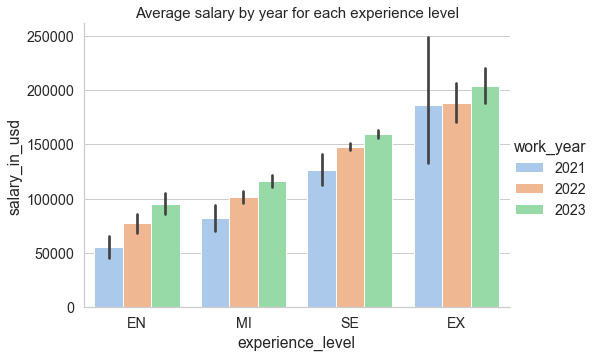

In [61]:
sns.catplot(x='experience_level',y='salary_in_usd', hue='work_year',order=['EN', 'MI','SE', 'EX'], 
               kind='bar', data=df[df.work_year>2020], palette="pastel", height=5, aspect=1.5)
plt.title('Average salary by year for each experience level', fontdict={'fontsize':15})
plt.show()

Obviously, we see an increase in salaries for each experience level over the years.

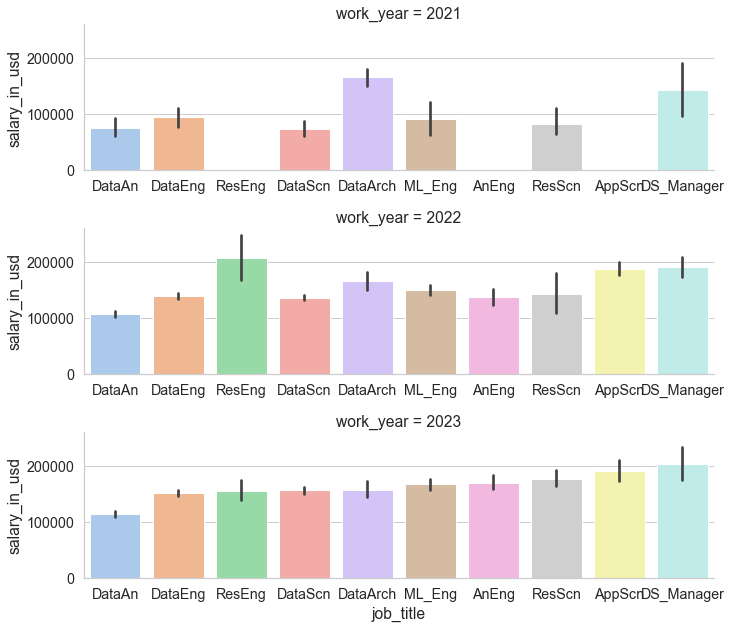

In [62]:
order = df_top10_job[df_top10_job.work_year==2023].groupby('job_title').agg('mean').sort_values(by='salary_in_usd').index
g = sns.catplot(x='job_title', y='salary_in_usd',row='work_year',  sharex=False,
            palette="pastel", order=order, 
            kind='bar', data=df_top10_job[df_top10_job.work_year>2020], height=3, aspect=3.6)

#g.set_title(f'Average Salary by job title for each year', fontdict={'fontsize':15})
g.set_xticklabels(['DataAn','DataEng','ResEng','DataScn','DataArch','ML_Eng','AnEng','ResScn','AppScn','DS_Manager'],)
#g.set_titles(" {row_var} = {row_name}", size=15, )

plt.show()

        Top 5 job titles with the biggest salary for each year



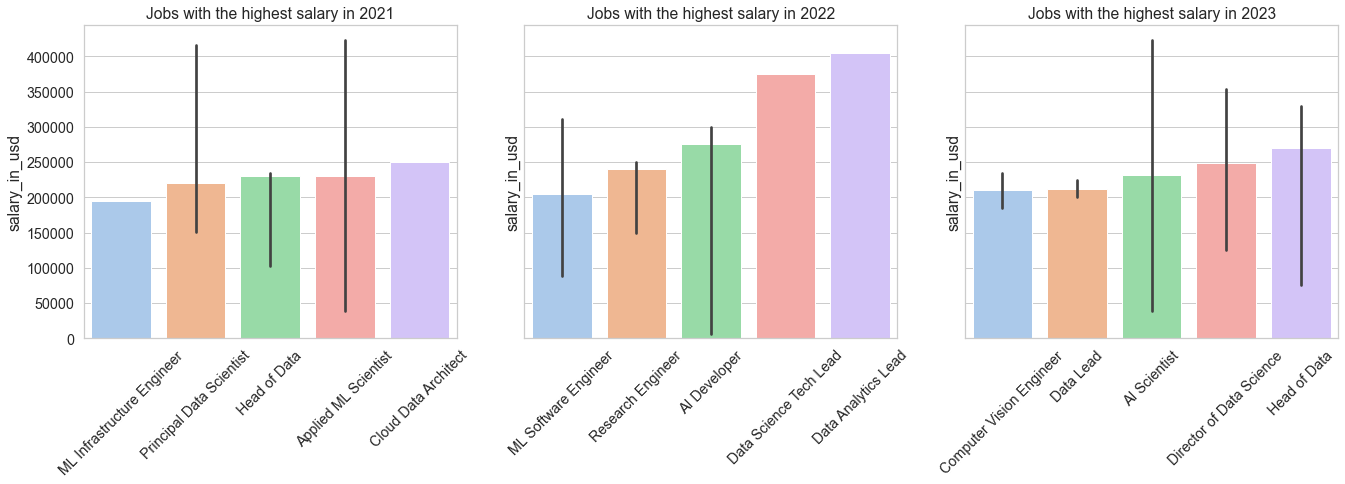

In [63]:
#Top 5 job titles with the biggest salary for each year
print('        Top 5 job titles with the biggest salary for each year\n', )
years = [2021, 2022, 2023]
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(19, 7))

for i in range(len(years)):
    year = years[i]
    order = df[df.work_year == year].groupby('job_title').agg('median').sort_values(by='salary_in_usd')[-5:].index 
    sns.barplot(x='job_title', y='salary_in_usd', palette="pastel", order=order, estimator='median',
                data=df[df.work_year == year], ax=axes[i])
    
    axes[i].set_title(f'Jobs with the highest salary in {year}')
    axes[i].tick_params(axis='x', rotation=45) 
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

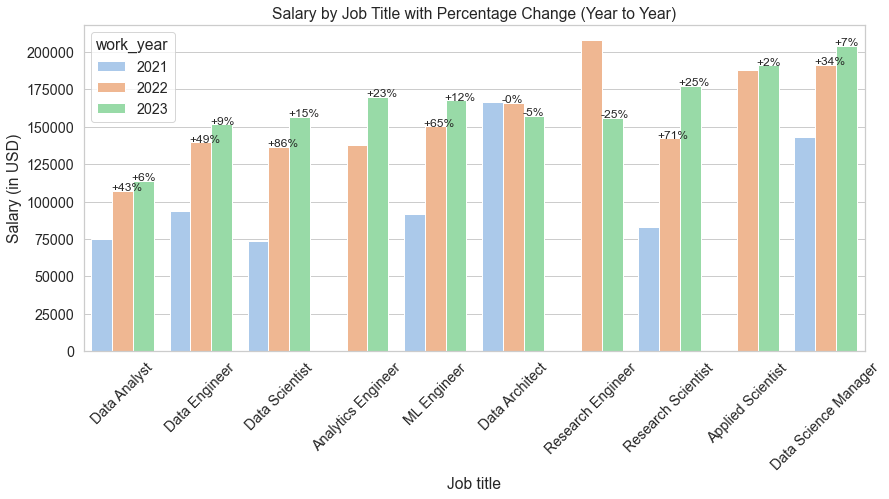

In [64]:
perc_df = df_top10_job[df_top10_job.work_year>2020].groupby(['job_title','work_year']).agg('mean')[['salary_in_usd']]
perc_df['salary_change'] = perc_df.groupby('job_title')['salary_in_usd'].pct_change() * 100
perc_df['salary_change'] = perc_df['salary_change'].round(2)
perc_df = perc_df.reset_index().fillna(0)

order = df_top10_job[df_top10_job.work_year>=2022].groupby('job_title').agg('mean').sort_values(by='salary_in_usd').index

def with_hue(plot, df, job_list, year_list, Number_of_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        job=job_list[i]
        for j in range(len(year_list)):
            year=year_list[j]
            if df[(df.job_title==job) & (df.work_year==year)].shape[0]!=0:
                percentage = df[(df.job_title==job) & (df.work_year==year)]['salary_change'].values[0]
                x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
                y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
                if   percentage > 0:  
                    ax.annotate(f'+{percentage:.0f}%', (x, y), size = 12)
                if  percentage < 0:  
                    ax.annotate(f'{percentage:.0f}%', (x, y), size = 12)    
    plt.xticks(rotation=45)
    plt.show()                   
#   
# sns.set_theme(font_scale=1.5, style="whitegrid")

# Create the bar plot with error bars representing percentage change
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=perc_df, x='job_title', y='salary_in_usd', hue='work_year', 
                 order=order,palette='pastel')
ax.set(title="Salary by Job Title with Percentage Change (Year to Year)", xlabel='Job title', ylabel='Salary (in USD)')
with_hue(ax, perc_df, order, [2021,2022,2023], 10)

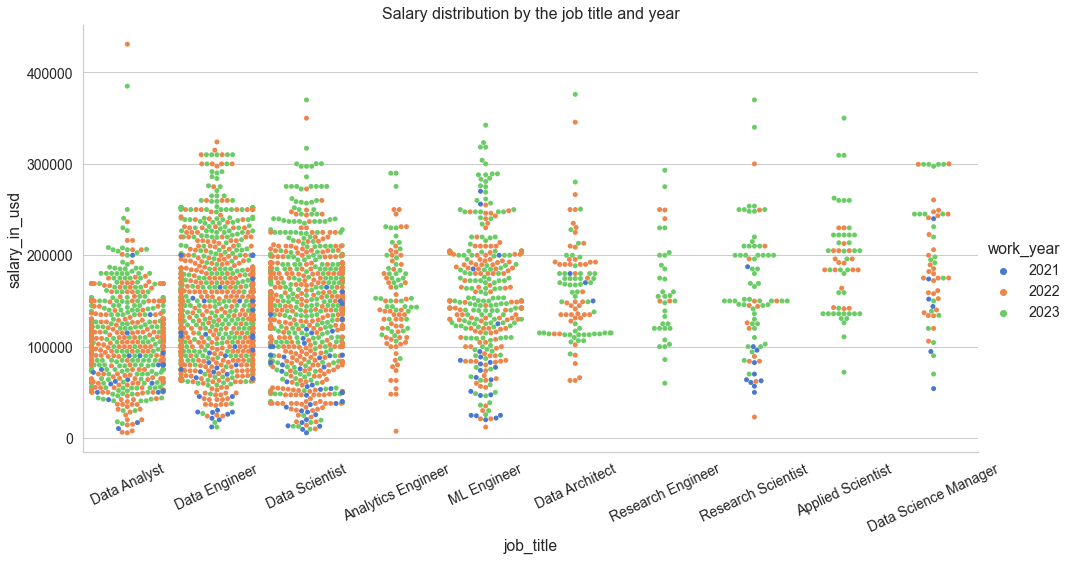

In [65]:
sns.catplot(data=df_top10_job[df_top10_job.work_year>2020], 
           x='job_title', y='salary_in_usd',  order=order, hue='work_year', kind="swarm",
            palette="muted", height=7, aspect=2)

plt.title(f'Salary distribution by the job title and year', fontdict={'fontsize':16})
plt.xticks(rotation=25)
plt.tick_params(labelsize = 14)
#plt.xlabel('Job title', size=14)
#plt.ylabel('Salary in USD', size=14)
plt.show()

Let's look at the salary distribution for top 5 most frequent job titles.

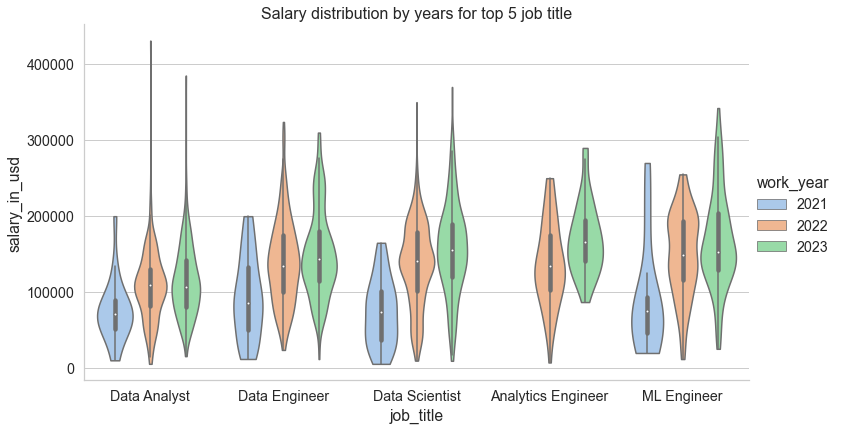

In [66]:
top5_job = df.job_title.value_counts()[:5].index
df_top5_job = df.query('job_title in @top5_job')

sns.catplot(data=df_top5_job[df_top5_job.work_year>2020], 
           x='job_title', y='salary_in_usd', hue='work_year', kind="violin", bw_adjust=.5, cut=0,
           order=order[:5], palette="pastel", height=6, aspect=1.8)

plt.title(f'Salary distribution by years for top 5 job title', fontdict={'fontsize':16})
#plt.xticks(rotation=25)
plt.show()

**<span style="font-size: larger;">Conclusion</span>**     
     
In our analysis of salaries in the Data Science field, we found the following trends:

1. **Salaries Increase Annually:** On average, salaries in the Data Science field increase each year for professionals at every experience level.

2. **Few Exceptions:** With the exception of two job titles, Data Architect and Research Engineer, salaries across almost all positions have shown consistent year-over-year growth according to our data.

3. **Significant Salary Growth:** Over the last two years, certain job titles, including Data Scientist, Research Scientist, ML Engineer, Analytics Engineer, and Data Engineer, have experienced remarkable salary growth, with increases exceeding 50% compared to the previous year.

4. **Top 3 High-Paying Job Titles:** Based on our data, the top three job titles with the highest salaries in each year were as follows:
   - 2021: Cloud Data Architect, Applied ML Scientist, Head of Data
   - 2022: Data Analytics Lead, Data Science Tech Lead, AI Developer
   - 2023: Head of Data, Director of Data Science, AI Scientist

These findings provide valuable insights into salary trends within the Data Science industry, highlighting consistent growth patterns and exceptional salary increases for specific roles.


## Job Title Recommendation

In [67]:
df_top_jobs = df[df.work_year>2021].groupby('job_title')[['salary_in_usd']].agg(['mean', min, max]).sort_values(('salary_in_usd', 'mean'), ascending=False)[:20]
df_top_jobs

salary_in_usd                
                                         mean     min     max
job_title                                                    
Data Science Tech Lead          375000.000000  375000  375000
Data Lead                       212500.000000  200000  225000
Data Analytics Lead             211254.500000   17509  405000
Marketing Data Analyst          200000.000000  200000  200000
Data Science Manager            196964.901961   70000  300000
Director of Data Science        195601.800000   57786  353200
ML Software Engineer            192420.000000   10000  375000
Applied Scientist               190264.482759   72000  350000
Principal ML Engineer           190000.000000  190000  190000
Head of Data                    181533.714286   31520  329500
Head of Data Science            178617.857143   60795  314100
Data Infrastructure Engineer    175051.666667  143000  190000
ML Manager                      175000.000000  150000  200000
Business Intelligence Engineer  174150.000000  129300  225000
Research Scientist              169964.685714   23000  370000
Computer Vision Engineer        165986.750000   10000  342810
Research Engineer               163108.378378   60000  293000
ML Scientist                    161986.761905   22800  230000
Data Architect                  161562.153061   63000  376080
ML Engineer                     160452.154362   12000  342300

Let's consider the job titles with high salary for every experience level using data for 2 last years.

In [68]:
df_22_23 = df_top10_job[df_top10_job.work_year>2021]

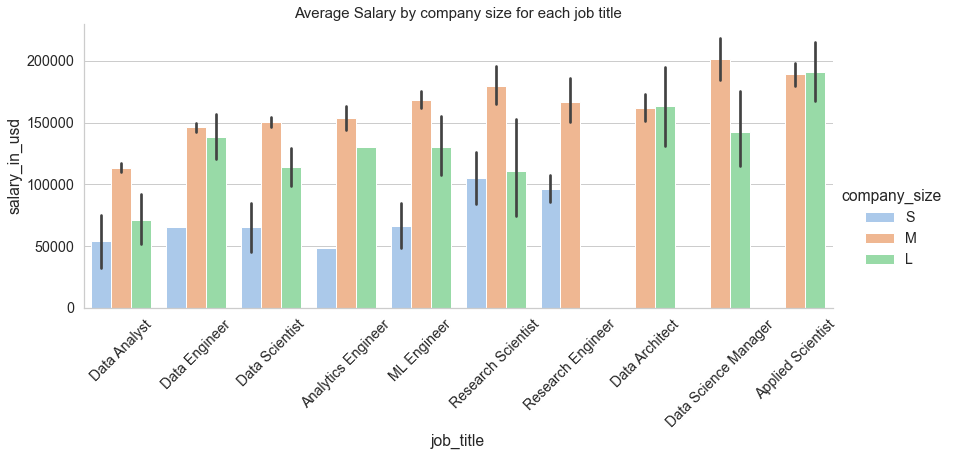

In [69]:
sns.catplot(x='job_title', y='salary_in_usd', hue='company_size', 
               order=top10_job_sort.index,   hue_order=['S', 'M','L'], 
            palette="pastel",
               kind='bar', data=df_22_23, height=5, aspect=12/5)
plt.title('Average Salary by company size for each job title', fontdict={'fontsize':15})
plt.xticks(rotation=45)
plt.show()

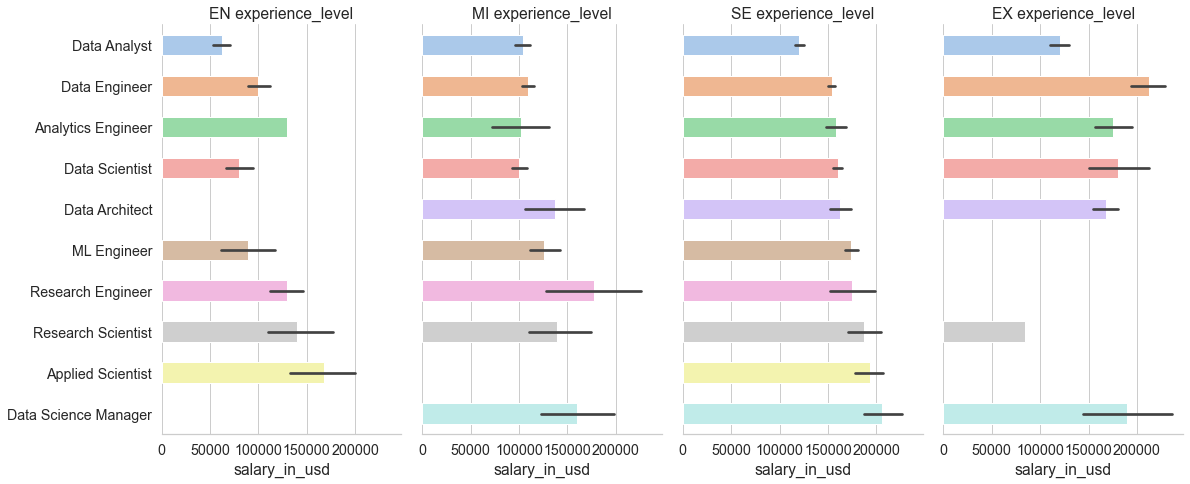

In [70]:
df_22_23 = df_top10_job[df_top10_job.work_year>2021]
order_top10_22_23 = df_22_23[df_22_23['experience_level']=='SE'].groupby('job_title').agg('mean').sort_values('salary_in_usd')['salary_in_usd'].round().index

g=sns.catplot(data=df_22_23, x='salary_in_usd', y='job_title', kind='bar', palette="pastel",
            width=.5, order = order_top10_22_23, color='job_title',
            col='experience_level',  col_order=['EN', 'MI', 'SE', 'EX'], height=7, aspect=0.6)

g.set_axis_labels("salary_in_usd", "")
g.set_yticklabels(order_top10_22_23)
g.set_titles("{col_name} {col_var}")
g.despine(left=True)
plt.tight_layout()
plt.show()

In [71]:
df_22_23.pivot_table(index='job_title', columns='experience_level', 
                         values='salary_in_usd')[['EN', 'MI', 'SE', 'EX']].sort_values('SE')

experience_level,EN,MI,SE,EX
job_title,,,,
Data Analyst,62239.372549,103826.000000,120301.778075,120000.000000
Data Engineer,100042.500000,109442.209040,153681.926136,212522.720000
Analytics Engineer,130000.000000,102480.230769,158404.024691,175125.000000
Data Scientist,80356.581395,99971.024194,159862.867450,180645.833333
Data Architect,NaN,137000.000000,162500.989130,167500.000000
ML Engineer,89652.357143,126171.786885,174274.125561,NaN
Research Engineer,130000.000000,178000.000000,174773.181818,NaN
Research Scientist,140000.000000,139152.294118,187127.956522,84053.000000
Applied Scientist,167356.666667,NaN,192907.692308,NaN


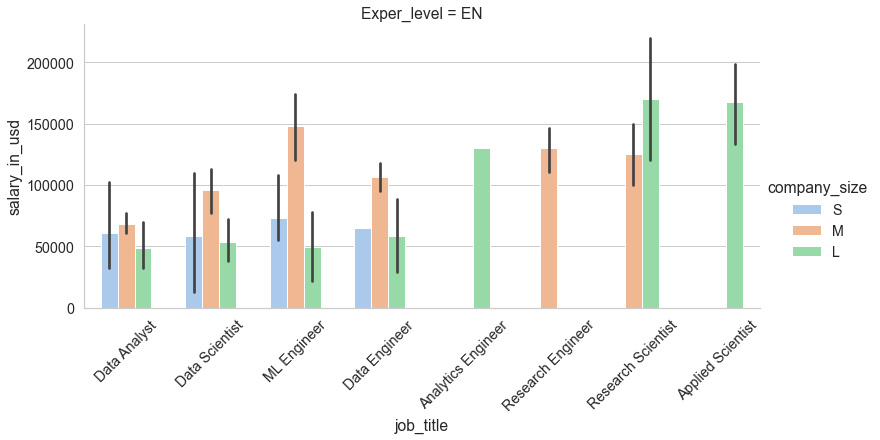

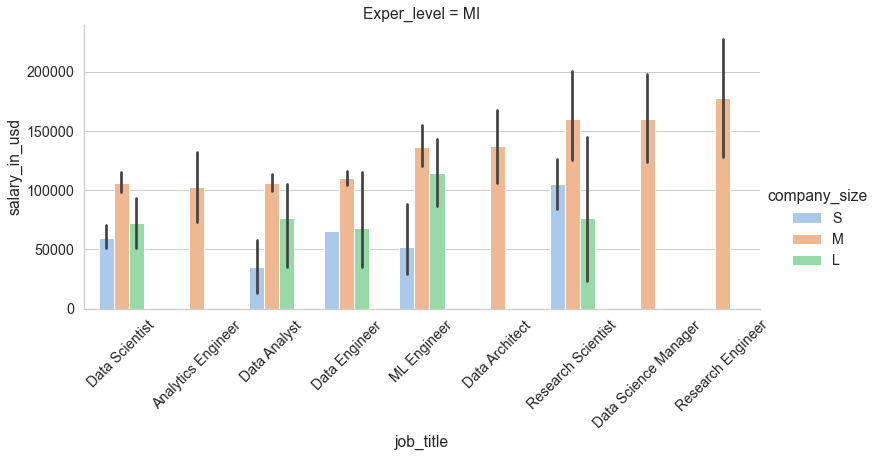

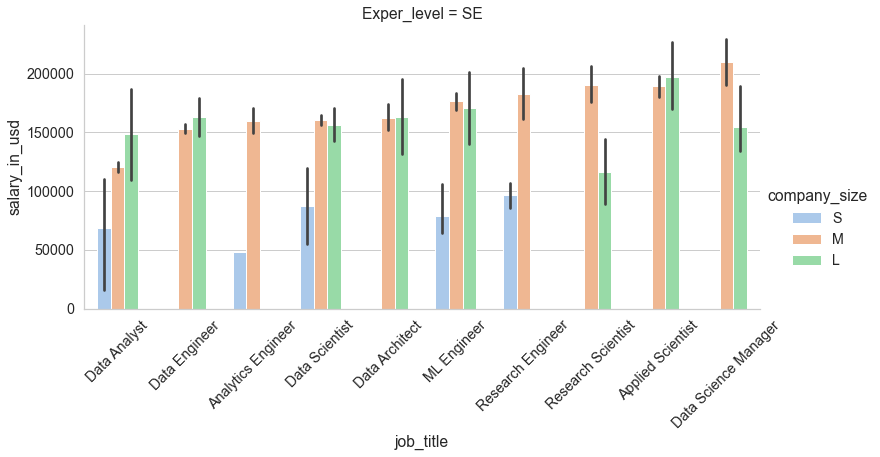

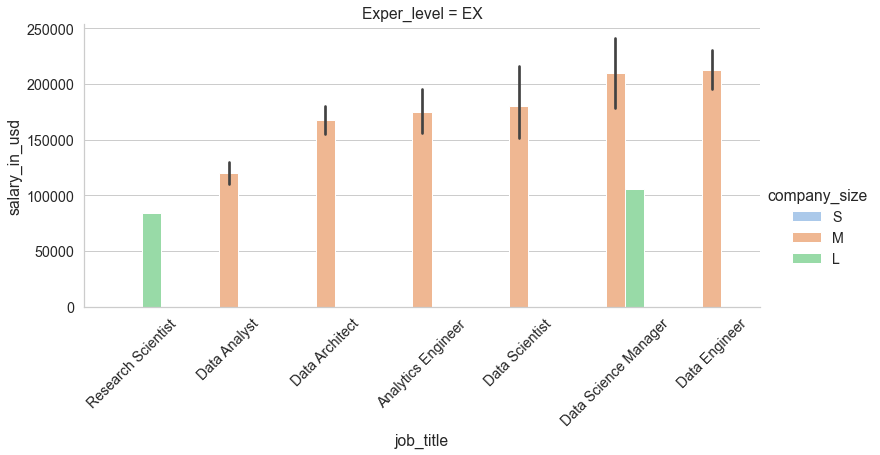

In [72]:
for level in ['EN','MI', 'SE','EX']:
    order = df_22_23[df_22_23.experience_level==level].groupby('job_title').agg('mean').sort_values(by='salary_in_usd').index

    g = sns.catplot(x='job_title', y='salary_in_usd',hue='company_size', width=0.6,
            palette="pastel", order=order, #hue='job_title', 
            hue_order=['S','M','L'],
            kind='bar', data=df_22_23[df_22_23.experience_level==level], height=5, aspect=2.2)
    g.tick_params(axis='x', rotation=45)
    g.set(title=f'Exper_level = {level}')

plt.show()

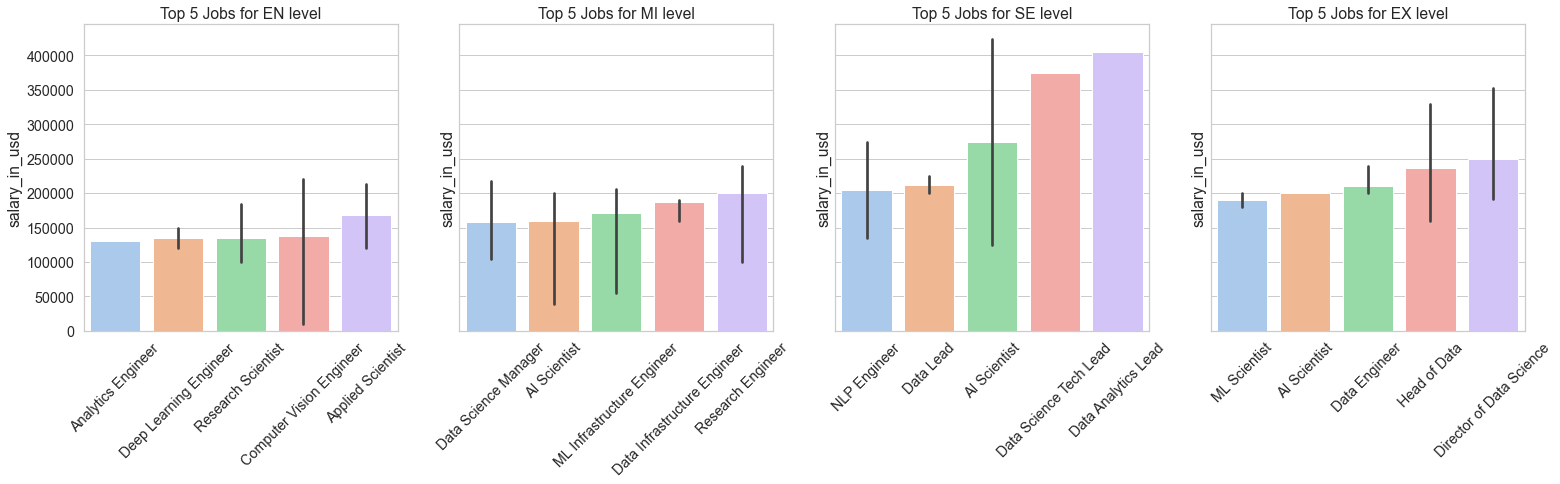

In [73]:
#Top 5 job titles with the biggest salary for each experience level
df_22_23 = df[df.work_year>2021]
levels = ['EN','MI', 'SE','EX']
fig, axes = plt.subplots(1, 4, sharey=True, figsize=(22, 7))

for i in range(len(levels)):
    level = levels[i]
    order = df_22_23[df_22_23.experience_level == level].groupby('job_title').agg('median').sort_values(by='salary_in_usd')[-5:].index 
    sns.barplot(x='job_title', y='salary_in_usd', palette="pastel", order=order, estimator='median',
                data=df_22_23[df_22_23.experience_level == level], ax=axes[i])
    
    axes[i].set_title(f'Top 5 Jobs for {level} level')
    axes[i].tick_params(axis='x', rotation=45) 
    axes[i].set_xlabel('')
    
plt.tight_layout()
plt.show()

### Hypothesis testing

I am going to check some hypothesis to make bette decision about job recommendations.

**Hypothesis 1. Data Engineers have less salary than ML Engineers.**     

**H0** = There is no significant difference between salaries of Data Engineer and ML Engineer.    
**H1** = The salary of Data Engineers is less than of ML Engineers.       
*for this purpose we use T-test*


**Hypothesis 2. There is a significant difference between salaries among companies of different sizes.**     

**H0** = There is no significant difference between salaries among companies of different sizes.    
**H1** = There is a significant difference between salaries among companies of different sizes.       
*for this purpose we use ANOVA test*


In [74]:
# define significance level (alpha) to make a decision - 5%
alpha = 0.05

#### T-test

In [75]:
df_htest = df[(df.work_year>2021)][['job_title', 'experience_level', 'company_size', 'salary_in_usd']]
a_salaries = df_htest[df_htest.job_title=='Data Engineer']['salary_in_usd']
b_salaries = df_htest[df_htest.job_title=='ML Engineer']['salary_in_usd']

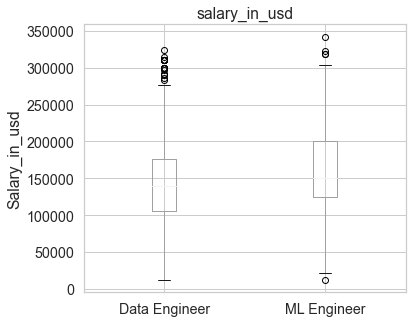

In [76]:
ax = df_htest.query('job_title in ["ML Engineer", "Data Engineer"]').boxplot(by='job_title', 
                                                                     column='salary_in_usd',
                                                                     figsize=(6, 5)
                   )
ax.set_xlabel('')
ax.set_ylabel('Salary_in_usd')
plt.suptitle('')

plt.tight_layout()
plt.show()

In [77]:
sns.set_theme(font_scale=1.5, style="whitegrid")

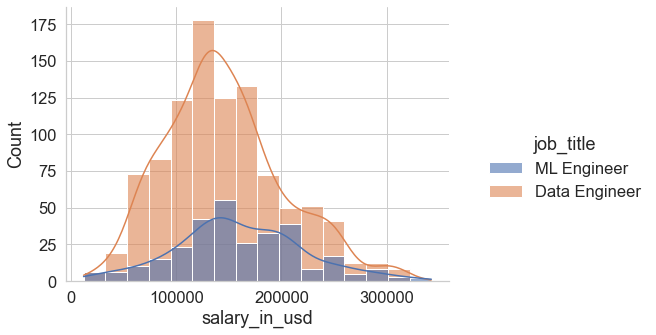

In [78]:
sns.displot(data=df_htest.query('job_title in ["ML Engineer", "Data Engineer"]'), kde=True, bins=16,
            x='salary_in_usd', hue='job_title', alpha=0.6, height=5, aspect=1.4)

In [79]:
mean_a = a_salaries.mean()
mean_b = b_salaries.mean()
print(f'Observed difference: {mean_b - mean_a:.0f}')
print(f'Variance of group A: {a_salaries.var():.0f}')
print(f'Variance of group B: {b_salaries.var():.0f}')

Observed difference: 14766
Variance of group A: 3237509455
Variance of group B: 3680042033


For better understanding of whether there is a difference or not, we can conduct Permutation test first

In [80]:
# Permutation test 
import random

def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean()
    
nA = a_salaries.shape[0]
nB = b_salaries.shape[0]
print(perm_fun(df_htest.salary_in_usd, nA, nB))

3928.9704038405325


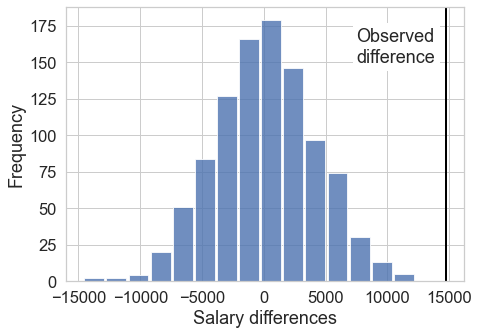

In [81]:
random.seed(1)
perm_diffs = [perm_fun(df_htest.salary_in_usd, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(7, 5))
ax.hist(perm_diffs, bins=15, rwidth=0.9, alpha=0.8)
ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.text(7500, 150, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Salary differences')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [82]:
# convert perm_diffs to numpy array 
perm_diffs = np.array(perm_diffs)
print(np.mean(perm_diffs > mean_b - mean_a))

0.0


In [83]:
# T-test
res = stats.ttest_ind(a_salaries, 
                      b_salaries,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.6f}')

# Compare the p-value to alpha
if res.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

p-value for single sided test: 0.000105
Reject the null hypothesis


The analysis indicates a statistically significant difference in salaries between Data Engineers and Machine Learning Engineers. Specifically, the salary of Data Engineers is smaller than that of Machine Learning Engineers.

#### One-way ANOVA test

In [84]:
model = smf.ols('salary_in_usd ~ company_size', data=df_htest).fit()
aov_table = sm.stats.anova_lm(model)
print(aov_table,' \n')

# Compare the p-value to alpha
if model.f_pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in salaries among company sizes.")
else:
    print("Fail to reject the null hypothesis: Salaries do not significantly differ among company sizes.")


                  df        sum_sq       mean_sq         F        PR(>F)
company_size     2.0  4.115320e+11  2.057660e+11  57.77907  2.078403e-25
Residual      3452.0  1.229345e+13  3.561255e+09       NaN           NaN  

Reject the null hypothesis: There is a significant difference in salaries among company sizes.


#### Two-way ANOVA test

In [85]:
# Create a formula for the two-way ANOVA
formula = 'salary_in_usd ~ experience_level + company_size + experience_level:company_size'

# Fit the ANOVA model
model = smf.ols(formula, data=df_htest).fit()

# Perform the two-way ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print("Two-way ANOVA results:")
print(anova_table)

Two-way ANOVA results:
                                     sum_sq      df           F         PR(>F)
experience_level               1.930178e+12     3.0  215.858590  2.636900e-128
company_size                   1.466621e+11     2.0   24.602611   2.459529e-11
experience_level:company_size  1.009955e+11     6.0    5.647343   7.558216e-06
Residual                       1.026228e+13  3443.0         NaN            NaN


**Interpretation:** The p-value for "experience_level" is very close to zero (2.636900e-128), which indicates that there is a highly significant effect of experience level on salary. In other words, different experience levels have a significant impact on salary.    
The p-value for "company_size" is also very close to zero (2.459529e-11), indicating a highly significant effect of company size on salary. In other words, different company sizes have a significant impact on salary.    
The p-value for the interaction effect (experience_level:company_size) is also very small. So, the combined effect of experience level and company size significantly affects salary.


**<span style="font-size: larger;">Conclusion: Key Insights and Recommendations</span>**     

Among the Lead/Manager positions, certain job titles stand out with remarkable salary levels. These titles, including ML Software Engineer, Applied Scientist, Data Infrastructure Engineer, Business Intelligence Engineer, Research Scientist, Computer Vision Engineer, Research Engineer, ML Scientist, ML Engineer, and Data Architect, offer high-income opportunities for professionals.     

Moreover, when considering experience levels, we can offer following job title recommendations for candidates seeking positions with high earning potential:     

**For Entry-level Specialist:** Applied Scientist, Computer Vision Engineer, Research Scientist, Deep Learning Engineer or Analytics Engineer.     

**For Middle-level Specialist:** Research Engineer, Data Infrastructure Engineer, ML Infrastructure Engineer, AI Scientist, Data Science Manager.      

**For Senior-level Specialist:** Data Analytics Lead, Data Science Tech Lead, AI Scientist, Data Lead, NLP Engineer.      

**For Experienced-level Specialist:** Director of Data Science, Head of Data, Data Engineer, AI Scientist, ML Scientist.    

Furthermore, our hypothesis test confidently confirms that the salary of ML Engineers is higher than that of Data Engineer. Additionally, our second hypothesis test underscores the significant difference in salaries across company sizes. As we can see for the most positions the salary is higher in medium sized companies.


## Project Conclusion

<span style="font-size:120%">**Overall Conclusion**</span> 

In the course of this data analysis project, we have uncovered several key insights that can be valuable for both professionals in the Data Science field and organizations seeking to make informed hiring decisions.

<span style="color:green;font-size:120%">**Exploratory Data Analysis (EDA) Insights**</span> 

Our EDA revealed that our dataset primarily comprises Senior-level employees working full-time in medium-sized companies based in the USA. The mean salary for these employees is $137,555, with identified outliers mostly associated with Senior-level roles. We observed that salaries tend to increase with experience and differ based on company size. Furthermore, a closer look at the top 10 most common job titles highlighted variations in average salaries, with the lowest found in Data Analyst positions and the highest in Data Science Manager and Applied Scientist roles.

<span style="color:green;font-size:120%">**Optimal Hiring Decisions**</span> 

In our mission to optimize hiring decisions, we built a predictive model for potential salaries, Gradient Boosting for regression. Our model achieved a Root Mean Squared Error (RMSE) of 44,219 and an R-squared value of 0.45 on the test data.   

Utilizing this model, we projected potential salaries for our own dataset, which comprises diverse scenarios for Data Scientist positions within medium-sized companies, taking into account various employment types and experience levels.     

Our analysis indicates that, for medium-sized companies seeking to hire Data Scientists, contract-based employment arrangements often offer the most cost-effective solution, especially when considering entry-level or mid-level specialists. In situations requiring on-site staff, part-time employment for entry-level or mid-level positions can also yield financial benefits.        

It's important to note that the actual cost-effectiveness of hiring decisions may vary based on the unique objectives, circumstances of each organization, and the actual costs associated with each employee type.

<span style="color:green;font-size:120%">**Salary Trends over Time**</span>     
           
The analysis of salary trends over time showed the following insights.           
    
- We observed that salaries in the Data Science field generally increase annually across all experience levels, with few exceptions (for Data Architect and Research Engineer).      
   
- Over the last two years, certain job titles, including Data Scientist, Research Scientist, ML Engineer, Analytics Engineer, and Data Engineer, have experienced remarkable salary growth, with increases exceeding 50% compared to the previous year.        
     
- We identified the top three highest-paying job titles for each year:     
   - 2021: Cloud Data Architect, Applied ML Scientist, Head of Data
   - 2022: Data Analytics Lead, Data Science Tech Lead, AI Developer
   - 2023: Head of Data, Director of Data Science, AI Scientist      
   
These findings provide valuable insights into salary trends within the Data Science industry, highlighting consistent growth patterns and exceptional salary increases for specific roles.
   

<span style="color:green;font-size:120%">**Job Title Recommendations**</span> 

Based on our findings, we can provide job title recommendations for professionals seeking high-income opportunities in Data Science:


For Entry-level Specialists: Consider roles like Applied Scientist, Computer Vision Engineer, Research Scientist, Deep Learning Engineer, or Analytics Engineer.        
For Middle-level Specialists: Explore positions such as Research Engineer, Data Infrastructure Engineer, ML Infrastructure Engineer, AI Scientist, or Data Science Manager.       
For Senior-level Specialists: High-paying positions include Data Analytics Lead, Data Science Tech Lead, AI Scientist, Data Lead, and NLP Engineer.             
For Experienced-level Specialists: Explore roles like Director of Data Science, Head of Data, Data Engineer, AI Scientist, and ML Scientist.            

<span style="color:green;font-size:120%">**Hypothesis Testing**</span> 

We conducted two hypothesis tests, with the first confirming that the salary of ML Engineers is higher than that of Data Engineers. The second test showed a significant difference in salaries among company sizes, with medium-sized companies consistently offering higher salaries for most positions.

- - - - - - - - - - - - 
These findings offer a comprehensive understanding of salary trends, hiring decisions, and job recommendations in the Data Science field. However, organizations should consider their unique needs and circumstances when making hiring decisions.
